In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


In [4]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   Species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

# Missing Values/Null Values Count
df.isnull().sum()

number of duplicated rows are 1


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [7]:
# Remove the duplicate row
df = df.drop_duplicates()

# Verify the change by checking the number of duplicated rows
print(f"Number of duplicated rows after removal: {df.duplicated().sum()}")


Number of duplicated rows after removal: 0


# Understanding the features

In [8]:
# Dataset Columns
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

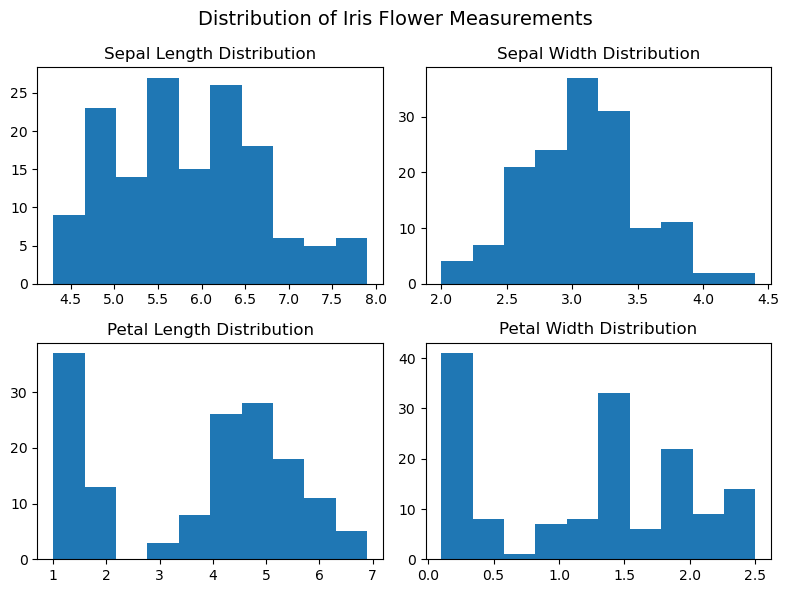

In [9]:
# Create a 2x2 grid of subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Sepal Length Distribution
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(df['sepal length (cm)'])
plt.title('Sepal Length Distribution')

# Sepal Width Distribution
plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(df['sepal width (cm)'])
plt.title('Sepal Width Distribution')

# Petal Length Distribution
plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(df['petal length (cm)'])
plt.title('Petal Length Distribution')

# Petal Width Distribution
plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(df['petal width (cm)'])
plt.title('Petal Width Distribution')

# Adjust layout for better spacing and show the plot
plt.tight_layout()  
plt.show()

In [10]:
# Feature EngineerEngineering 

In [13]:
# Encode the categorical 'Species' column
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Check unique values in 'Species'
unique_species = df['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species)  # Expected: [0, 1, 2]


Encoded Species Values:
[0 1 2]


In [14]:
# Defining the X and y
x=df.drop(columns=['Species'], axis=1)
y=df['Species']

In [15]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [16]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Species
1    36
0    35
2    33
Name: count, dtype: int64

In [17]:

def evaluate_model(x_train, x_test, y_train, y_test):
    # Initialize the RandomForestClassifier
    model = RandomForestClassifier(random_state=0)

    # Fit the model to the training data
    model.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Calculate confusion matrix for train and test data
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Plot confusion matrices
    fig, ax = plt.subplots(1, 2, figsize=(11,4))
    sns.heatmap(cm_train, annot=True, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

    # Calculate and print classification reports
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

    # Extracting metrics
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    # Returning scores
    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test]
    return model_score

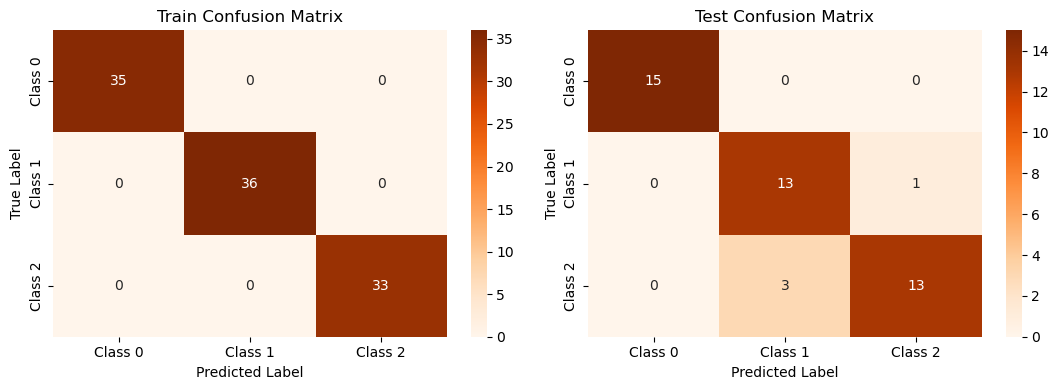


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        36 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       104 |
| weighted avg |           1 |        1 |          1 |       104 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.8125   | 0.928571 |   0.866667 | 14        |
| 2            |    0.928571 | 0.8125   |   0.866667 | 16        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.911111 |
| m

In [18]:
# Call the function
model_scores = evaluate_model(x_train, x_test, y_train, y_test)

# Print the evaluation metrics
print("\nModel Scores (Precision, Recall, Accuracy, F1):")
print(model_scores)

# Hyperparameter Tunning 

In [19]:
rf_model = RandomForestClassifier(
    random_state=0, 
    max_depth=10,  # Limit the depth of trees
    min_samples_split=5,  # Require more samples to split nodes
    min_samples_leaf=4,  # Require more samples at leaves
    max_features='sqrt',  # Limit number of features used for splits
    n_estimators=100,  # Number of trees
    bootstrap=True,  # Bootstrap sampling
    oob_score=True  # Use out-of-bag samples for validation
)

rf_model.fit(x_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

# Calculate accuracy on the training and test data
train_accuracy = rf_model.score(x_train, y_train)
test_accuracy = rf_model.score(x_test, y_test)

print(f'Train accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Cross-validation scores: [0.9047619  1.         0.95238095 1.         1.        ]
Mean cross-validation score: 0.9714285714285713
Train accuracy: 0.9807692307692307
Test accuracy: 0.9111111111111111


# Pickling the file 

In [20]:
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

print("Model saved to 'random_forest_model.pkl'")

Model saved to 'random_forest_model.pkl'
